# Exercise 5

In [428]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

### 1.

In [429]:
DF = pd.read_csv('51-data.csv')
DF.head(10)

,sex,location,purchases,retention_time
0,female,Helsinki,7.0,57.1
1,female,Helsinki,5.0,NaN
2,female,Turku,8.0,50.6
3,male,Helsinki,5.0,31.7
4,female,Helsinki,2.0,120.0
5,male,Helsinki,2.0,NaN
6,female,Helsinki,2.0,122.2
7,male,Turku,NaN,87.9
8,male,Turku,3.0,0.5
9,female,Helsinki,5.0,101.1


In [430]:
print(DF.location.unique())
print(DF.sex.unique())
print(DF.describe())
DF.loc[DF.retention_time < 0, 'retention_time'] = np.NAN

['Helsinki' 'Turku' 'Tampere' '33100' '20100']
['female' 'male' 'nale']
        purchases  retention_time
count  191.000000      177.000000
mean     5.010471       48.879661
std      2.323766       46.141814
min      0.000000      -14.900000
25%      3.000000       13.600000
50%      5.000000       32.900000
75%      7.000000       72.400000
max     13.000000      237.800000


In [431]:
print(DF.sex.unique())
print(DF.location.unique())
print(DF.describe())

['female' 'male' 'nale']
['Helsinki' 'Turku' 'Tampere' '33100' '20100']
        purchases  retention_time
count  191.000000      176.000000
mean     5.010471       49.242045
std      2.323766       46.020171
min      0.000000        0.300000
25%      3.000000       13.750000
50%      5.000000       33.500000
75%      7.000000       72.925000
max     13.000000      237.800000


In [432]:
DF['purchases'].replace(np.NAN, 0, inplace=True) # inplace=True - make changers in the original data frame

In [433]:
Grouped = DF.groupby(['location','sex'])

In [434]:
#for name, group in Grouped:
#    print(name, end="\n\n")
#    print(group, end="\n\n")

1. "nale" instead of "male" on index 60

In [435]:
DF.iloc[60]

sex                nale
location          Turku
purchases           0.0
retention_time    106.1
Name: 60, dtype: object

In [436]:
DF.loc[DF.sex == "nale", 'sex'] = "male"

In [437]:
DF.iloc[60]

sex                male
location          Turku
purchases           0.0
retention_time    106.1
Name: 60, dtype: object

2. Convert 20100 => Turku and 33100 => Tampere

In [438]:
DF.loc[(DF.location == "20100"), "location"], DF.loc[(DF.location == "33100"), "location"] = "Turku", "Tampere"

In [439]:
Grouped = DF.groupby(['location','sex'])
for name, group in Grouped:
    print(name, end="\n\n")
    print(group, end="\n\n")

('Helsinki', 'female')

        sex  location  purchases  retention_time
0    female  Helsinki        7.0            57.1
1    female  Helsinki        5.0             NaN
4    female  Helsinki        2.0           120.0
6    female  Helsinki        2.0           122.2
9    female  Helsinki        5.0           101.1
16   female  Helsinki        6.0            59.4
20   female  Helsinki        3.0             6.5
34   female  Helsinki        6.0            87.0
36   female  Helsinki        3.0            47.4
53   female  Helsinki        8.0            97.6
54   female  Helsinki        8.0             9.8
58   female  Helsinki        8.0             6.6
64   female  Helsinki        1.0            20.5
66   female  Helsinki        7.0             NaN
69   female  Helsinki        7.0           199.9
71   female  Helsinki        5.0            60.8
74   female  Helsinki        1.0            86.7
76   female  Helsinki       10.0            58.7
79   female  Helsinki        7.0           17

In [440]:
Grouped['retention_time'].median()

location  sex   
Helsinki  female    57.10
          male      31.70
Tampere   female    16.80
          male      52.10
Turku     female    45.65
          male      25.30
Name: retention_time, dtype: float64

3. Fill na with group median

In [441]:
DF.fillna(DF.groupby(['location','sex']).transform('median'), inplace=True)

In [442]:
DF

,sex,location,purchases,retention_time
0,female,Helsinki,7.0,57.1
1,female,Helsinki,5.0,57.1
2,female,Turku,8.0,50.6
3,male,Helsinki,5.0,31.7
4,female,Helsinki,2.0,120.0
...,...,...,...,...
195,male,Turku,3.0,40.5
196,male,Helsinki,3.0,36.9
197,female,Helsinki,6.0,59.2
198,male,Helsinki,5.0,31.8


### 2.

In [443]:
RAW = pd.read_csv('GDS5037.soft', header=160, sep='\t', index_col="ID_REF")
probes = pd.read_csv('52-probes.ids.txt', header=None)[0]
control = pd.read_csv('52-control.ids.txt', header=None)[0]
asthama = pd.read_csv('52-asthma.ids.txt',header=None)[0]
RAW

,IDENTIFIER,GSM1068478,GSM1068479,GSM1068481,GSM1068482,GSM1068483,GSM1068486,GSM1068487,GSM1068488,GSM1068490,...,GSM1068529,GSM1068530,GSM1068534,GSM1068536,GSM1068541,GSM1068553,GSM1068554,GSM1068558,GSM1068559,GSM1068564
ID_REF,,,,,,,,,,,,,,,,,,,,,
A_23_P100001,FAM174B,11.76500,11.15030,11.82380,10.96300,11.63470,11.07970,11.30700,11.17300,11.01220,...,11.46210,11.13460,11.53310,11.30700,11.03410,10.68630,11.13070,11.19560,11.13110,10.79130
A_23_P100011,AP3S2,6.68845,6.29378,5.77885,6.20746,4.78520,5.38453,5.88975,6.39307,6.00136,...,6.53933,5.77446,5.84170,5.98821,5.76583,5.92124,5.72922,6.91738,6.35952,6.13216
A_23_P100022,SV2B,6.40638,6.53990,2.94554,5.62157,6.12992,5.64204,6.80579,5.74520,6.05809,...,6.06607,5.03564,5.23585,4.78694,2.93856,4.82587,4.44784,5.80114,5.78344,5.36149
A_23_P100056,RBPMS2,1.88171,1.43777,1.47388,1.50057,1.42719,1.41453,1.31007,1.50026,1.58497,...,1.87270,1.42304,1.35702,1.89157,1.98907,2.01289,1.26051,2.84686,1.42486,1.76015
A_23_P100074,AVEN,9.16313,8.79248,9.41351,9.75378,8.85106,9.07236,9.14032,9.32616,9.34733,...,9.71164,9.03423,9.42655,9.18300,9.36121,9.40767,9.31643,9.35973,8.86756,8.94563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E1A_r60_n9,CONTROL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EQC,CONTROL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NegativeControl,CONTROL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [444]:
cols = control.append(asthama)
DF2  = RAW.loc[probes, cols]

C:\Users\disha\AppData\Local\Temp\ipykernel_12096\832848955.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cols = control.append(asthama)


##### 2.1 Create a box plot of gene expression levels for each subject. Do you notice visible differences between the subjects or between the groups?

In [445]:
DF2

,GSM1068458,GSM1068459,GSM1068460,GSM1068461,GSM1068462,GSM1068463,GSM1068464,GSM1068465,GSM1068466,GSM1068467,...,GSM1068556,GSM1068557,GSM1068558,GSM1068559,GSM1068560,GSM1068561,GSM1068562,GSM1068563,GSM1068564,GSM1068565
ID_REF,,,,,,,,,,,,,,,,,,,,,
A_23_P100355,9.73450,9.82071,10.38230,10.43700,10.37030,10.59030,10.48990,10.76750,10.57110,9.91477,...,10.94870,10.28070,10.21060,10.48320,10.67700,10.76620,10.75330,10.59410,10.63990,10.53500
A_23_P101829,7.34121,8.00249,7.17964,7.53055,7.10362,7.07410,6.69177,7.37524,7.49978,7.34268,...,7.18555,7.18596,7.50311,7.61950,7.35386,7.63585,7.29750,7.18897,7.11162,7.49630
A_23_P102235,12.12020,12.31900,12.42870,12.23300,12.14920,12.22640,12.16290,12.19920,12.26940,12.09810,...,12.28210,12.28820,12.29720,12.35510,12.30030,12.24170,12.40860,12.05510,12.23110,12.02790
A_23_P102607,7.07051,6.91728,7.16459,6.19421,6.86695,6.84001,7.34184,7.09113,6.87948,6.67208,...,7.20520,7.04128,6.85812,6.87079,7.12792,6.55122,6.75280,7.29706,7.01142,6.79003
A_23_P102743,7.31329,6.38099,7.14409,6.72997,7.03673,6.75132,6.62888,6.63785,6.87825,6.71155,...,6.98354,7.11257,6.91354,7.21952,6.96467,6.99149,6.88292,6.80598,7.04567,6.81248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A_32_P80255,9.72013,9.20204,8.81502,9.55290,9.88867,9.22377,9.70530,9.14508,9.19637,9.92583,...,9.53174,9.59771,9.75629,9.44850,9.54217,9.48188,9.00412,9.22302,9.81349,9.51958
A_32_P83784,9.33227,8.47086,9.01771,9.30044,8.65403,8.70030,8.26453,8.52626,8.62973,8.91668,...,8.59478,8.24108,8.50516,8.47277,8.62158,8.80231,8.72801,8.87190,8.61916,8.55743
A_32_P902988,6.90708,8.63739,6.96754,7.68574,8.46000,8.44160,9.05813,9.64739,7.50242,9.80580,...,8.96406,9.65092,12.11820,8.48703,9.87380,11.01930,10.15100,8.71636,11.18370,9.48001


<AxesSubplot:>

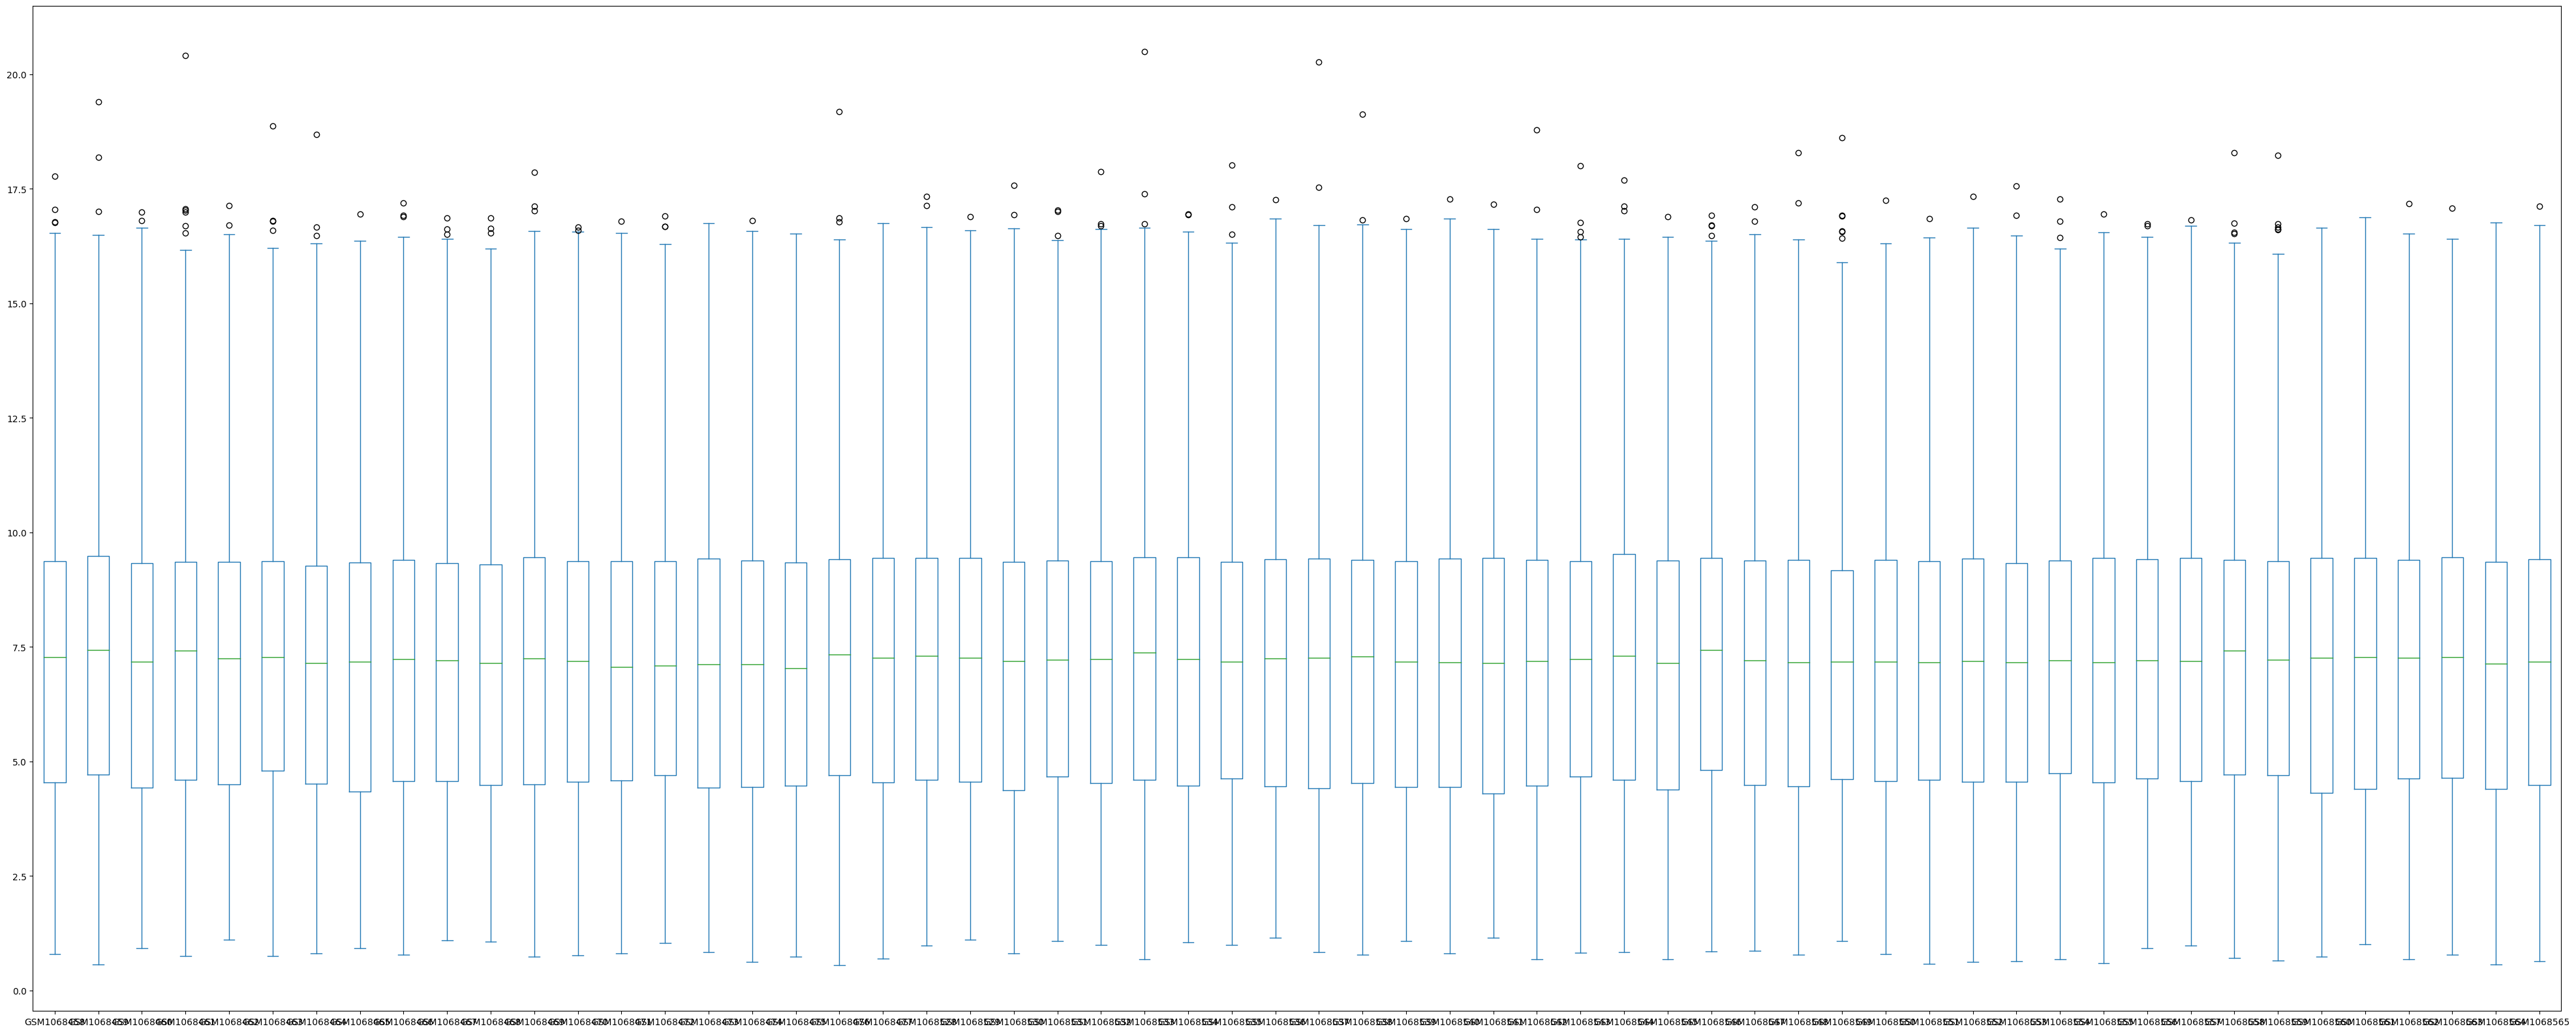

In [446]:
DF2.plot.box(figsize=(50,20))

##### 2.2 Use a T-test to find differentially expressed genes (i.e. probes for which the means are different between the control and asthma groups). Adjust the p-values with the Benjamini-Hochberg method.

In [447]:
# 1 Calculate P values 
probes_control = DF2.loc[:, control]
probes_asthama = DF2.loc[:, asthama]
pvalues = []
probes = []

for (probe,values) in DF2.iterrows():
    probes.append(probe)
    pvalues.append(stats.ttest_ind(probes_control.loc[probe], probes_asthama.loc[probe]).pvalue)
    

Probe_P_values = pd.DataFrame({'Probes': probes, 'P_values': pvalues})
Probe_P_values.set_index('Probes',inplace=True)
Probe_P_values

,P_values
Probes,
A_23_P100355,0.075914
A_23_P101829,0.036554
A_23_P102235,0.007868
A_23_P102607,0.908704
A_23_P102743,0.255610
...,...
A_32_P80255,0.258446
A_32_P83784,0.685398
A_32_P902988,0.002612


##### 2.3 Create histograms of the unadjusted and adjusted p-values. Why do these two histograms differ?

<AxesSubplot:ylabel='Frequency'>

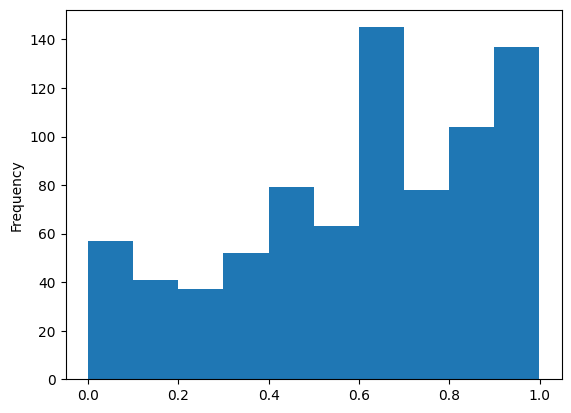

In [448]:
from statsmodels.stats import multitest

Probe_P_values['Adjusted_P_values'] = multitest.fdrcorrection(Probe_P_values['P_values'])[1]
Probe_P_values.Adjusted_P_values.plot.hist()

<AxesSubplot:ylabel='Frequency'>

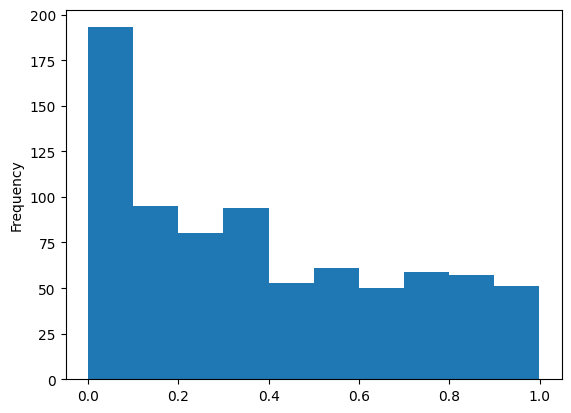

In [449]:
Probe_P_values.P_values.plot.hist()

##### 2.4 How many differentially expressed genes (i.e. statistically significant differences) are there at the false discovery rate of 0.05?

##### 2.5 Sort the adjusted p-values in ascending order. Which genes do the first ten probes correspond to?

In [450]:
Probe_P_values.Adjusted_P_values.sort_values().head(10)

Probes
A_23_P208030    0.000196
A_24_P301501    0.000924
A_24_P91566     0.006729
A_23_P13914     0.006749
A_24_P86240     0.007439
A_24_P40907     0.011480
A_23_P251132    0.013582
A_32_P7721      0.013582
A_23_P51958     0.017374
A_24_P260371    0.018345
Name: Adjusted_P_values, dtype: float64

### 3.

In [451]:
DF3  = pd.read_csv('53-data.csv')

##### 3.1 For each weekday (Monday - Sunday), calculate the mean daily number of cyclists for each street. Plot the means as a bar plot.

In [452]:
Grouped_by_weekdays = DF3.groupby('weekday')
Daily_mean_cyclist_by_week = Grouped_by_weekdays[['Eteläesplanadi','Kaivokatu','Kuusisaarentie','Merikannontie','Länsituulenkuja']].mean()
Daily_mean_cyclist_by_week

,Eteläesplanadi,Kaivokatu,Kuusisaarentie,Merikannontie,Länsituulenkuja
weekday,,,,,
0,1226.753247,2379.021645,1226.705628,1939.714286,1107.783550
1,1280.682403,2454.695279,1237.832618,2001.721030,1092.738197
2,1291.271552,2486.909483,1212.193966,1965.698276,1093.909483
3,1265.633621,2451.125000,1153.931034,1891.719828,1077.504310
4,1129.940171,2199.495726,976.363248,1613.910256,1031.500000
5,773.017241,1434.659483,659.728448,1225.362069,824.581897
6,658.157895,1259.175439,782.763158,1349.109649,680.364035


<AxesSubplot:xlabel='weekday'>

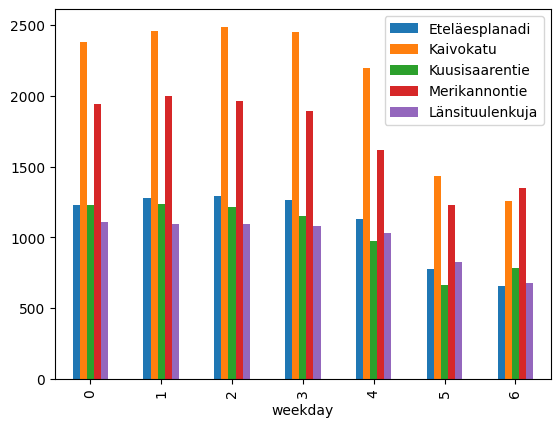

In [453]:
Daily_mean_cyclist_by_week.plot.bar()

##### 3.2 For each month (January - December), calculate the mean daily number of cyclists for each street. Plot the means as a bar plot.


In [454]:
Grouped_by_months = DF3.groupby('month')
Daily_mean_cyclist_by_month = Grouped_by_months[['Eteläesplanadi','Kaivokatu','Kuusisaarentie','Merikannontie','Länsituulenkuja']].mean()
Daily_mean_cyclist_by_month

,Eteläesplanadi,Kaivokatu,Kuusisaarentie,Merikannontie,Länsituulenkuja
month,,,,,
1,264.606452,580.180645,295.361290,469.432258,468.354839
2,203.578947,548.165414,287.187970,407.609023,433.849624
3,310.859259,781.592593,455.051852,646.555556,608.614815
4,1067.606667,2010.746667,1157.620000,1819.673333,956.926667
5,1881.643836,3249.575342,1728.732877,2969.602740,1292.041096
6,2246.456897,3752.103448,2013.758621,3437.758621,1691.706897
7,1512.065041,3410.943089,1563.341463,2885.585366,1268.845528
8,2095.725806,4152.596774,2010.887097,3152.580645,1532.338710
9,1681.791667,3351.075000,1545.975000,2368.983333,1373.308333


<AxesSubplot:xlabel='month'>

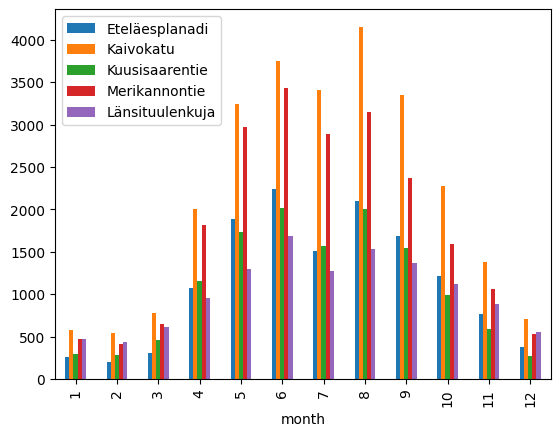

In [455]:
Daily_mean_cyclist_by_month.plot.bar()

##### 3.4 Calculate the Spearman's correlation coefficient and create a scatter plot for each pair of streets.

In [456]:
# 1 Eteläesplanadi and Kaivokatu
# 2 Eteläesplanadi and Kuusisaarentie
# 3 Eteläesplanadi and Merikannontie
# 4 Eteläesplanadi and Länsituulenkuja
# 5 Kaivokatu and Kuusisaarentie
# 6 Kaivokatu and Merikannontie
# 7 Kaivokatu and Länsituulenkuja
# 8 Kuusisaarentie and Merikannontie
# 9 Kuusisaarentie and Länsituulenkuja
# 10 Merikannontie and Länsituulenkuja

subset = DF3[['Eteläesplanadi','Kaivokatu','Kuusisaarentie','Merikannontie','Länsituulenkuja']]
subset.corr(method='spearman')



,Eteläesplanadi,Kaivokatu,Kuusisaarentie,Merikannontie,Länsituulenkuja
Eteläesplanadi,1.000000,0.892638,0.892009,0.896663,0.664733
Kaivokatu,0.892638,1.000000,0.950914,0.962023,0.635698
Kuusisaarentie,0.892009,0.950914,1.000000,0.979178,0.597560
Merikannontie,0.896663,0.962023,0.979178,1.000000,0.599511
Länsituulenkuja,0.664733,0.635698,0.597560,0.599511,1.000000


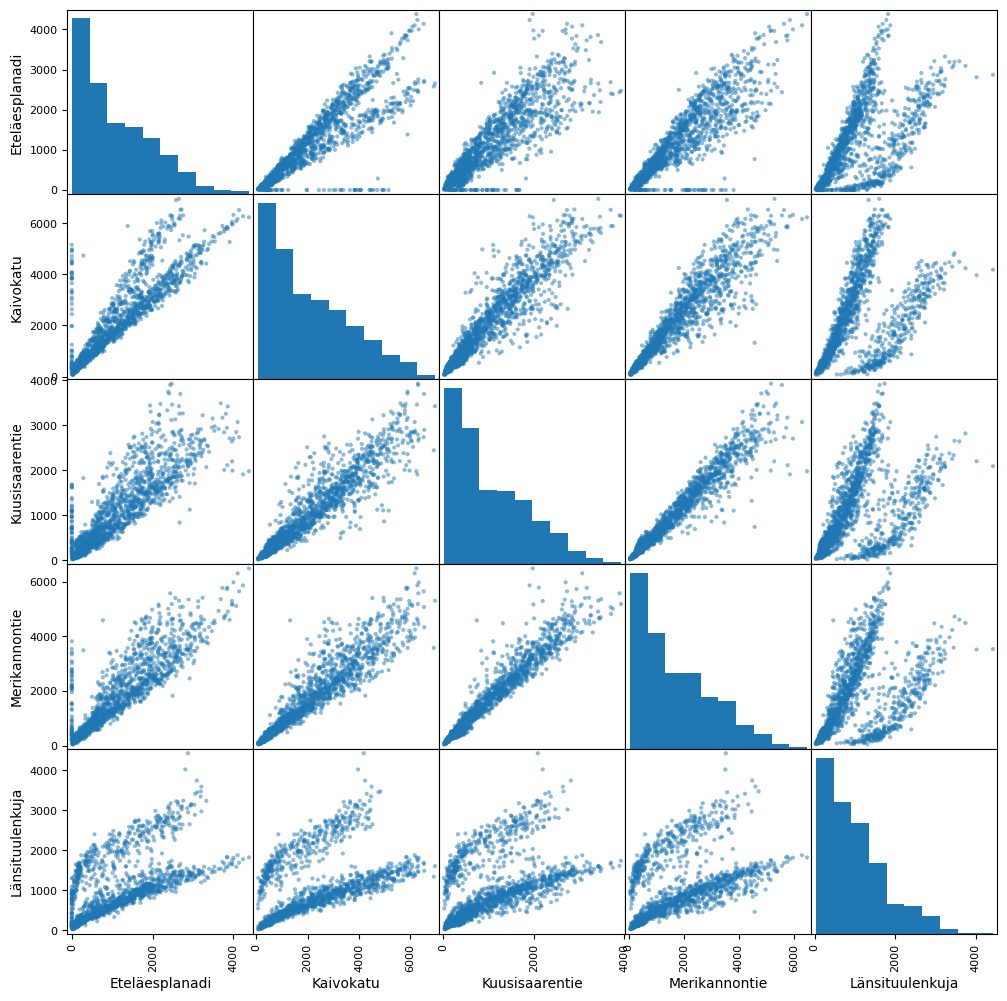

In [457]:
pd.plotting.scatter_matrix(DF3.iloc[:, 0:5], figsize=(12,12))
plt.show()

### 4.

An advertisement company followed online customers to discover how effectively advertisements lure them to spend money. The data files 54-image.csv and 54-video.csv contain information on how much customers spent in total after clicking on advertisements.

Is there statistical evidence to claim that the total amount spent by customers is different if they click on image advertisements than on video advertisements?

In [463]:
Image = pd.read_csv('54-image.csv')
Video = pd.read_csv('54-video.csv')
DF4 = pd.merge(Image, Video, on='person_id', how='outer')
DF4.dropna(inplace=True)

In [464]:
DF4.rename({'amount_spent_x': 'Image', 'amount_spent_y': 'Video'}, axis=1, inplace=True)
DF4

,person_id,Image,Video
0,87434,14.01,40.54
1,24844,10.46,78.26
2,23566,21.32,5.66
3,79972,121.10,24.05
4,37170,14.26,48.67
...,...,...,...
190,93697,75.49,36.97
191,55101,7.60,13.26
192,38367,11.76,44.81
193,77026,16.84,27.40


In [467]:
# h0 = Amount spent by customers is same if they click on image ad than on video ad
# ha = Amount spent by customers is different if they click on image ad than on video ad

def check_normality(data):
    pval = stats.shapiro(data).pvalue
    if pval >= 0.05:
        print(f'Data is normally Distributed [P-value = {pval}]')
    else:
        print(f'Data is not normally Distributed [P-value = {pval}]')

# 1 check normality
check_normality(DF4['Image'])
#check_normality(DF4['Video'])
print(stats.shapiro(Image['amount_spent']))

Data is not normally Distributed [P-value = 2.655453114341899e-11]
ShapiroResult(statistic=0.8109121918678284, pvalue=1.2337129744448977e-14)


<AxesSubplot:ylabel='Density'>

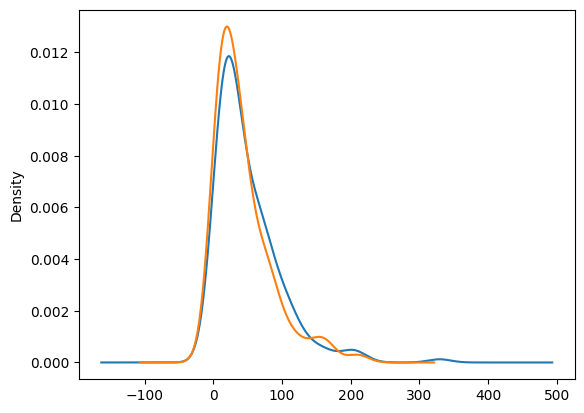

In [461]:
Image['amount_spent'].plot(kind='density')
Video['amount_spent'].plot(kind='density')

Video and Image data are normally distributed

In [462]:
# 2 unpaired t test to compare groups
print(f"T-test = {stats.mannwhitneyu(Image['amount_spent'],Video['amount_spent']).pvalue}")

T-test = 0.10522752647898526


P-value > 0.05 therefore, no significant difference between the two groups 